In [104]:
import numpy as np 
import matplotlib.pyplot as plt
import PIL.Image as Image


In [43]:
FILEFOLDER = './LogFiles'
FILENAME = 'test_1.txt'

filepath = f'{FILEFOLDER}/{FILENAME}'
history = {}

with open(filepath, 'r') as f:
    lines = f.readlines()

for line in lines:
    header = line.split(',')[0][4:]
    if not header in history:
        history[header] = [line[10:-4]]
    else:
        history[header].append(line[10:-4])

history.keys()

dict_keys(['GPGLL', '', 'GPRMC', 'GCROT', 'CCHPR', 'PXTB', 'DYSIG', 'CCAPM'])

In [84]:

gps_data = history['GPGLL']
sig_data = history['DYSIG']

sig_data = np.array([float(i) for i in sig_data])


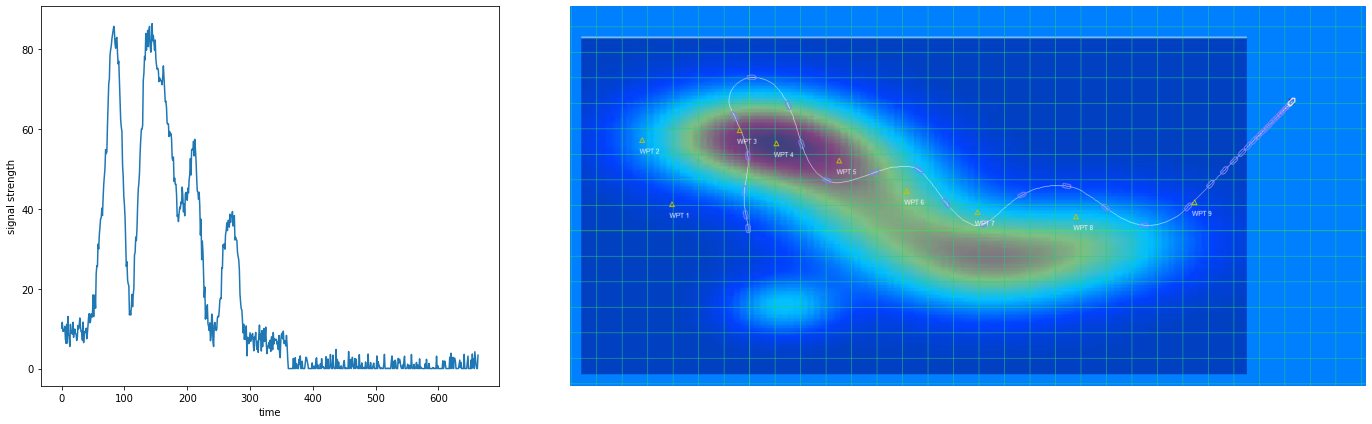

In [113]:
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
f.set_size_inches(20, 6)

a0.plot(sig_data)
a0.set_ylabel('signal strength')
a0.set_xlabel('time')

image = np.asarray(Image.open('LogImages/test_1_path.png'))
a1.imshow(image)
a1.axis('off')

f.tight_layout()

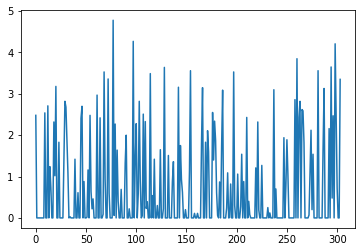

In [114]:
out_of_image_data = sig_data[360:]
# get rid of 0s
non_zero_data = out_of_image_data[out_of_image_data != 0]
plt.plot(out_of_image_data)

mean = np.mean(non_zero_data)
std = np.std(non_zero_data)


(array([29., 20., 18., 16., 12., 19.,  7.,  9.,  3.,  1.]),
 array([0.01 , 0.487, 0.964, 1.441, 1.918, 2.395, 2.872, 3.349, 3.826,
        4.303, 4.78 ]),
 <BarContainer object of 10 artists>)

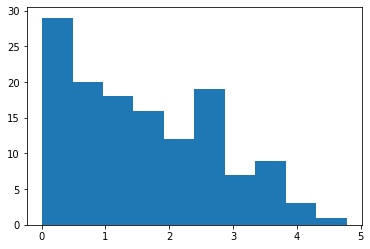

In [111]:
plt.hist(non_zero_data, 10)

In [112]:
print(mean)
print(std)

1.6185074626865672
1.1528637331695977
